In [2]:
from sklearn.linear_model import LinearRegression


In [3]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

(array([1.40771925e-06, 6.87689876e-06, 3.54783297e-06, 1.28406823e-06,
        4.85092443e-07, 1.80720714e-07, 3.80464661e-08, 2.85348496e-08,
        1.90232331e-08, 1.90232331e-08]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

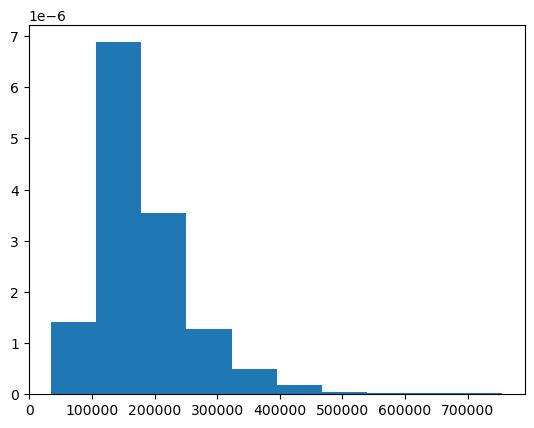

In [4]:
# target.value_counts()
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
xx = np.linspace( target.min(), target.max(), num=100)
xx_mean = target.mean()
plt.hist(target, density=True)
# plt.plot(xx, stats.poisson.pdf(xx, xx_mean))
# ?stats.poisson.pdf

In [5]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]
data_numerical = data[numerical_features]

In [6]:
# import seaborn as sns
# sns.pairplot(
#     ames_housing[numerical_features + [target_name]],
#     hue_order=target_name
# )



Start by fitting a ridge regressor (sklearn.linear_model.Ridge) fixing the penalty alpha to 0 to not regularize the model. Use a 10-fold cross-validation and pass the argument return_estimator=True in sklearn.model_selection.cross_validate to access all fitted estimators fitted on each fold. As discussed in the previous notebooks, use an instance of sklearn.preprocessing.StandardScaler to scale the data before passing it to the regressor.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data_numerical, target)

mdl = make_pipeline(
    # StandardScaler(),
    Ridge(alpha=0.0)
)

cv_results = cross_validate(
    estimator=mdl,
    X=data_train,
    y=target_train,
    cv=10,
    scoring="neg_mean_squared_error",
    # scoring="neg_root_mean_squared_error",
    return_estimator=True,
    return_train_score=True
)

pd.DataFrame(cv_results)

/home/alfaceor/anaconda3/envs/QuantFinance/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=9.17054e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alfaceor/anaconda3/envs/QuantFinance/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=1.42797e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alfaceor/anaconda3/envs/QuantFinance/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=6.27221e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,fit_time,score_time,estimator,test_score,train_score
0,0.019046,0.002859,(Ridge(alpha=0.0)),-1.588578e+09,-1.732866e+09
1,0.009780,0.002863,(Ridge(alpha=0.0)),-1.380486e+09,-1.804391e+09
2,0.006848,0.002932,(Ridge(alpha=0.0)),-1.233871e+09,-1.804897e+09
3,0.006924,0.003190,(Ridge(alpha=0.0)),-2.986291e+09,-1.624266e+09
4,0.059572,0.002244,(Ridge(alpha=0.0)),-1.235375e+09,-1.796404e+09
5,0.003612,0.003034,(Ridge(alpha=0.0)),-8.870604e+09,-1.289241e+09
6,0.003956,0.002598,(Ridge(alpha=0.0)),-1.863477e+09,-1.701125e+09
7,0.006482,0.003398,(Ridge(alpha=0.0)),-1.564428e+09,-1.750754e+09
8,0.005623,0.004010,(Ridge(alpha=0.0)),-2.258445e+09,-1.892787e+09
9,0.004780,0.002306,(Ridge(alpha=0.0)),-1.436515e+09,-1.741240e+09


In [8]:
np.array([np.abs(est[-1].coef_).max() for est in cv_results['estimator']]).max()

np.float64(2.254496845515777e+16)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data_numerical, target)

mdl = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0)
)

cv_results = cross_validate(
    estimator=mdl,
    X=data_train,
    y=target_train,
    cv=10,
    scoring="neg_mean_squared_error",
    # scoring="neg_root_mean_squared_error",
    return_estimator=True,
    return_train_score=True
)

coef = np.array([np.abs(est[-1].coef_).max() for est in cv_results['estimator']]).max()
print(coef, np.log10(coef))

24361.206823964774 4.386698798903623


In [10]:
df_cv_results = pd.DataFrame(cv_results)
df_cv_results

,fit_time,score_time,estimator,test_score,train_score
0,0.013712,0.003602,"(StandardScaler(), Ridge())",-9.225313e+08,-1.801586e+09
1,0.011996,0.003062,"(StandardScaler(), Ridge())",-2.738203e+09,-1.627702e+09
2,0.009698,0.003268,"(StandardScaler(), Ridge())",-1.492812e+09,-1.751170e+09
3,0.009485,0.003516,"(StandardScaler(), Ridge())",-1.030274e+10,-1.136236e+09
4,0.007529,0.003637,"(StandardScaler(), Ridge())",-1.346798e+09,-1.756491e+09
5,0.008533,0.003150,"(StandardScaler(), Ridge())",-1.428417e+09,-1.752053e+09
6,0.008622,0.003138,"(StandardScaler(), Ridge())",-1.426014e+09,-1.747601e+09
7,0.006809,0.003122,"(StandardScaler(), Ridge())",-3.101377e+09,-1.629286e+09
8,0.012004,0.004258,"(StandardScaler(), Ridge())",-1.126786e+09,-1.781146e+09
9,0.008145,0.003800,"(StandardScaler(), Ridge())",-1.042337e+09,-1.792379e+09


In [11]:
print(df_cv_results.agg(
    {
        "test_score" : 'mean',
        "train_score" : 'mean'
    } 
)
)

test_score    -2.492801e+09
train_score   -1.677565e+09
dtype: float64


In [12]:
est_0 = cv_results['estimator'][0]
est_0.feature_names_in_

array(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal'], dtype=object)

<Axes: >

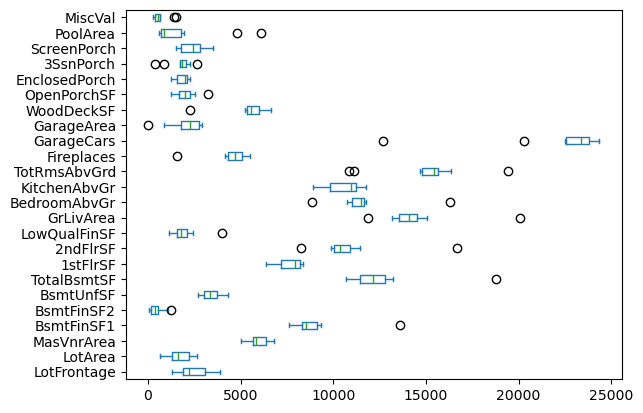

In [13]:
est_0 = cv_results['estimator'][0]
# est_0[-1].feature_names_in_
df_coefs  = pd.DataFrame([np.abs(est[-1].coef_) for est in cv_results['estimator']], columns=est_0.feature_names_in_)
fig, ax = plt.subplots()
df_coefs.plot.box(vert=False, ax=ax)
# ax.set(
#     xscale = "log"
# )

In [14]:
df_coefs.describe().T['mean'].sort_values(ascending=False)

GarageCars       22117.131470
TotRmsAbvGrd     14970.688528
GrLivArea        14451.364075
TotalBsmtSF      12639.505937
BedroomAbvGr     11585.372216
2ndFlrSF         10870.281464
KitchenAbvGr     10577.263653
BsmtFinSF1        9062.791922
1stFlrSF          7663.464003
MasVnrArea        5957.130646
WoodDeckSF        5415.804259
Fireplaces        4456.558985
BsmtUnfSF         3404.818205
LotFrontage       2490.387596
ScreenPorch       2384.376312
OpenPorchSF       2046.091787
GarageArea        2025.629973
LowQualFinSF      1994.294907
PoolArea          1839.080967
EnclosedPorch     1835.379673
3SsnPorch         1731.024359
LotArea           1710.486603
MiscVal            654.459628
BsmtFinSF2         457.994271
Name: mean, dtype: float64

In [15]:
# data_train.drop(columns = "GarageArea")
# data_train.drop?

   fit_time  score_time                    estimator    test_score  \
0  0.011980    0.004211  (StandardScaler(), Ridge()) -1.466061e+09   
1  0.009408    0.003021  (StandardScaler(), Ridge()) -1.485799e+09   
2  0.009157    0.002841  (StandardScaler(), Ridge()) -8.917797e+08   
3  0.010690    0.003803  (StandardScaler(), Ridge()) -1.211471e+09   
4  0.009569    0.003107  (StandardScaler(), Ridge()) -2.726030e+09   
5  0.009945    0.002965  (StandardScaler(), Ridge()) -5.114602e+09   
6  0.009770    0.002808  (StandardScaler(), Ridge()) -1.633476e+09   
7  0.009557    0.003087  (StandardScaler(), Ridge()) -1.769296e+09   
8  0.008735    0.004017  (StandardScaler(), Ridge()) -1.718520e+09   
9  0.009174    0.003366  (StandardScaler(), Ridge()) -1.594848e+09   

    train_score  
0 -1.577182e+09  
1 -1.575818e+09  
2 -1.630593e+09  
3 -1.594015e+09  
4 -1.437778e+09  
5 -1.331416e+09  
6 -1.548248e+09  
7 -1.547403e+09  
8 -1.543289e+09  
9 -1.554791e+09  
test_score    -1.961188e+09
tra

<Axes: >

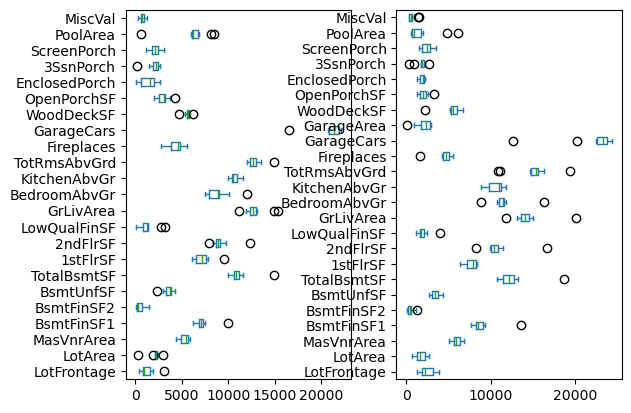

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data_numerical, target)

mdl = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0)
)

cv_results = cross_validate(
    estimator=mdl,
    # X=data_train,
    X=data_train.drop(columns = "GarageArea"),
    y=target_train,
    cv=10,
    scoring="neg_mean_squared_error",
    # scoring="neg_root_mean_squared_error",
    return_estimator=True,
    return_train_score=True
)

df_cv_results = pd.DataFrame(cv_results)
print(df_cv_results)

print( df_cv_results.agg(
    {
        "test_score" : 'mean',
        "train_score" : 'mean'
    } 
)
)

coef = np.array([np.abs(est[-1].coef_).max() for est in cv_results['estimator']]).max()
# print(coef, np.log10(coef))

est_0 = cv_results['estimator'][0]
# est_0[-1].feature_names_in_
df_coefs_02  = pd.DataFrame([np.abs(est[-1].coef_) for est in cv_results['estimator']], columns=est_0.feature_names_in_)
fig, ax = plt.subplots(1, 2)
df_coefs_02.plot.box(vert=False, ax=ax[0])
df_coefs.plot.box(vert=False, ax=ax[1])
# ax.set(
#     xscale = "log"
# )

In [17]:
df_coefs_02.describe().T.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
GarageCars,10.0,20976.998102,1631.001998,16574.806397,20823.582120,21396.356178,21906.948208,22135.585058
GrLivArea,10.0,12908.408424,1285.782863,11204.376840,12307.964515,12615.406910,12990.478284,15330.309395
TotRmsAbvGrd,10.0,12853.517222,864.344495,11997.914300,12395.037779,12683.779011,13010.638842,14963.999648
TotalBsmtSF,10.0,11197.220023,1400.881465,9972.817949,10570.786462,10798.267190,11161.726992,14959.646496
KitchenAbvGr,10.0,10692.273540,509.441149,10009.452899,10378.427539,10509.721327,10915.479230,11621.827019
2ndFlrSF,10.0,9195.247461,1208.064640,7884.621237,8677.363394,8949.458743,9141.228886,12320.169736
BedroomAbvGr,10.0,8944.430159,1324.470932,7540.734009,7982.603931,8851.743660,9053.161791,12031.346903
BsmtFinSF1,10.0,7291.365291,1018.314921,6251.044704,6851.196415,7038.353014,7338.010012,10013.840787
1stFlrSF,10.0,7253.376417,979.399782,6095.874527,6552.192156,7183.053801,7573.967652,9547.720383
PoolArea,10.0,6106.053493,2141.781130,566.100633,6075.799501,6192.389348,6793.500061,8439.062302


In [18]:
df_coefs.describe().T.sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
GarageCars,10.0,22117.131470,3527.089206,12666.144408,22586.488224,23351.655931,23822.763843,24361.206824
TotRmsAbvGrd,10.0,14970.688528,2477.336208,10823.934260,14810.960663,15418.550062,15633.813849,19425.475264
GrLivArea,10.0,14451.364075,2172.835205,11864.392637,13573.180075,14067.390101,14499.265675,20098.632319
TotalBsmtSF,10.0,12639.505937,2287.953965,10702.296745,11428.698716,12132.568124,12794.550011,18764.671835
BedroomAbvGr,10.0,11585.372216,1855.454988,8871.008183,11009.224474,11483.325028,11638.341600,16292.276021
2ndFlrSF,10.0,10870.281464,2210.641021,8256.956926,10038.966954,10348.789888,10890.705461,16697.236643
KitchenAbvGr,10.0,10577.263653,985.463829,8890.276482,9839.603161,10958.932373,11240.746302,11783.157496
BsmtFinSF1,10.0,9062.791922,1682.675908,7632.953739,8302.211597,8541.033191,9108.396911,13618.266508
1stFlrSF,10.0,7663.464003,686.296304,6346.794927,7167.110172,7945.654241,8221.430234,8355.534203
MasVnrArea,10.0,5957.130646,538.181949,5011.165731,5686.300342,5840.883541,6347.175206,6798.864207


### Question 6

Now, we search for the regularization strength that maximizes the generalization performance of our predictive model. Fit a sklearn.linear_model.RidgeCV instead of a Ridge regressor on the numerical data without the "GarageArea" column. Pass alphas=np.logspace(-3, 3, num=101) to explore the effect of changing the regularization strength.

What is the effect of tuning alpha on the variability of the weights of the feature "GarageCars"? Remember that the variability can be assessed by computing the standard deviation.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data_numerical, target)

np_alphas = np.logspace(-3, 3, num=101)

mdl = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=np_alphas, store_cv_results=True)
)

cv_results = cross_validate(
    estimator=mdl,
    # X=data_train,
    X=data_train,
    y=target_train,
    cv=10,
    scoring="neg_mean_squared_error",
    # scoring="neg_root_mean_squared_error",
    return_estimator=True,
    return_train_score=True
)


,mean,std
380.189396,1.983662e+09,2.461012e+08
436.515832,1.984153e+09,2.399842e+08
331.131121,1.985135e+09,2.520494e+08
501.187234,1.987041e+09,2.337374e+08
288.403150,1.988190e+09,2.577914e+08
...,...,...
0.001738,2.112596e+09,3.224980e+08
0.001514,2.112596e+09,3.224981e+08
0.001318,2.112597e+09,3.224982e+08
0.001148,2.112597e+09,3.224983e+08


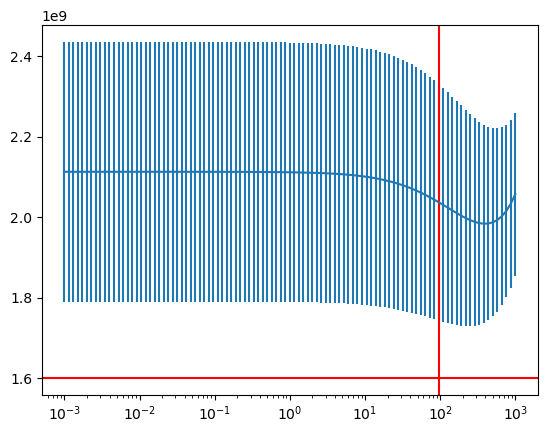

In [20]:
est_0 = cv_results["estimator"][0]

mse_alphas = [
    est[-1].cv_results_.mean(axis=0) for est in cv_results["estimator"]
]
df_cv_alphas = pd.DataFrame(mse_alphas, columns=np_alphas)
cv_alphas = df_cv_alphas.aggregate(["mean", "std"]).T
# cv_alphas
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(cv_alphas.index, cv_alphas['mean'], yerr=cv_alphas['std'])
ax.axvline(95.4992586021435, color='red')
ax.axhline(1600907585.8328536, color='red')
ax.set(
    xscale="log",
)
cv_alphas.sort_values(by='mean')

,mean,std
380.189396,1.983662e+09,2.461012e+08
436.515832,1.984153e+09,2.399842e+08
331.131121,1.985135e+09,2.520494e+08
501.187234,1.987041e+09,2.337374e+08
288.403150,1.988190e+09,2.577914e+08
...,...,...
0.001738,2.112596e+09,3.224980e+08
0.001514,2.112596e+09,3.224981e+08
0.001318,2.112597e+09,3.224982e+08
0.001148,2.112597e+09,3.224983e+08


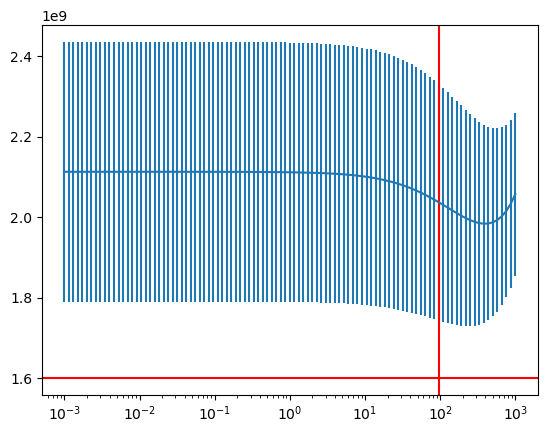

In [21]:
est_0 = cv_results["estimator"][0]

mse_alphas = [
    est[-1].cv_results_.mean(axis=0) for est in cv_results["estimator"]
]
df_cv_alphas = pd.DataFrame(mse_alphas, columns=np_alphas)
cv_alphas = df_cv_alphas.aggregate(["mean", "std"]).T
# cv_alphas
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(cv_alphas.index, cv_alphas['mean'], yerr=cv_alphas['std'])
ax.axvline(95.4992586021435, color='red')
ax.axhline(1600907585.8328536, color='red')
ax.set(
    xscale="log",
)
cv_alphas.sort_values(by='mean')

In [22]:
# GarageCars
b_GarageCars = (est_0.feature_names_in_ == 'GarageCars')
print(b_GarageCars)

est_0[-1].coef_[b_GarageCars][0]
np_GarageCars_coefs = np.array( [est[-1].coef_[b_GarageCars][0] for est in cv_results['estimator']] )
mse_alphas = [
    est[-1].cv_results_.mean(axis=0) for est in cv_results["estimator"]
]



np_GarageCars_coefs.shape, np_alphas.shape
# pd_alphas_GarageCars_coef = 
# pd.DataFrame({
#     "alphas" : np_alphas,
#     "GarageCars" : np_GarageCars_coefs
# })
# GarageCars_coef


[False False False False False False False False False False False False
 False False False  True False False False False False False False False]


((10,), (101,))

   fit_time  score_time                                          estimator  \
0  0.052338    0.007531  (StandardScaler(), RidgeCV(alphas=array([1.000...   
1  0.051015    0.003129  (StandardScaler(), RidgeCV(alphas=array([1.000...   
2  0.024970    0.002432  (StandardScaler(), RidgeCV(alphas=array([1.000...   
3  0.019663    0.004018  (StandardScaler(), RidgeCV(alphas=array([1.000...   
4  0.019232    0.002294  (StandardScaler(), RidgeCV(alphas=array([1.000...   
5  0.022974    0.002723  (StandardScaler(), RidgeCV(alphas=array([1.000...   
6  0.022384    0.003240  (StandardScaler(), RidgeCV(alphas=array([1.000...   
7  0.020903    0.002388  (StandardScaler(), RidgeCV(alphas=array([1.000...   
8  0.022507    0.002685  (StandardScaler(), RidgeCV(alphas=array([1.000...   
9  0.021414    0.002593  (StandardScaler(), RidgeCV(alphas=array([1.000...   

     test_score   train_score  
0 -1.046064e+09 -1.789335e+09  
1 -1.554316e+09 -1.721063e+09  
2 -1.445111e+09 -1.758385e+09  
3 -1.206953e+

<Axes: >

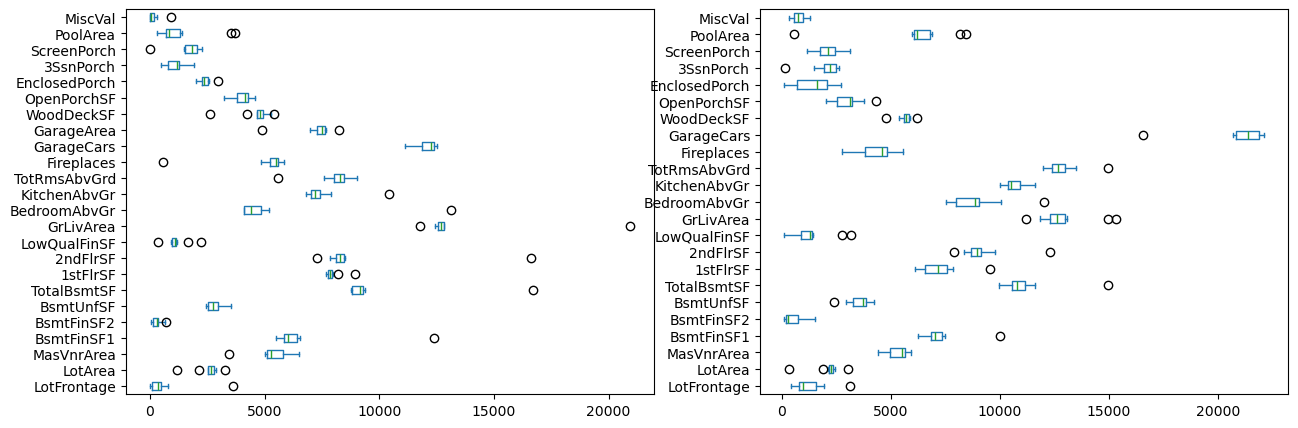

In [23]:
df_cv_results = pd.DataFrame(cv_results)
print(df_cv_results)

print( df_cv_results.agg(
    {
        "test_score" : 'mean',
        "train_score" : 'mean'
    } 
))

coef = np.array([np.abs(est[-1].coef_).max() for est in cv_results['estimator']]).max()
# print(coef, np.log10(coef))

# est_0[-1].feature_names_in_
df_coefs_03  = pd.DataFrame([np.abs(est[-1].coef_) for est in cv_results['estimator']], columns=est_0.feature_names_in_)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df_coefs_03.plot.box(vert=False, ax=ax[0])
df_coefs_02.plot.box(vert=False, ax=ax[1])
# ax.set(
#     xscale = "log"
# )

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data_numerical, target)

np_alphas = np.logspace(-3, 3, num=101)

model = make_pipeline(
    StandardScaler(),
    Ridge()
)

model.fit(data_train, target_train)
b_GarageCars = (model.feature_names_in_ == 'GarageCars')
# model.get_params()

all_coef = []
mean_coef = []
std_coef = []
for alpha in np_alphas:
    # print(alpha)
    model.set_params(**{"ridge__alpha": alpha})
    cv_results = cross_validate(
        estimator=model,
        X=data_train,
        y=target_train,
        cv=10,
        scoring="neg_mean_squared_error",
        # scoring="neg_root_mean_squared_error",
        return_estimator=True,
        return_train_score=True
    )
    GarageCars_coef = np.array([est[-1].coef_[b_GarageCars][0] for est in cv_results['estimator']])
    all_coef.append(GarageCars_coef)
    mean_coef.append(GarageCars_coef.mean())
    std_coef.append(GarageCars_coef.std())
    # print( cv_results['estimator'] )
    # print(GarageCars_coef)

df_alphas_GarageCars = pd.DataFrame({
    "alphas" : np_alphas,
    "mean_coef" : mean_coef,
    "std_coef" : std_coef
})

df_alphas_GarageCars

,alphas,mean_coef,std_coef
0,0.001000,21959.078321,3449.021209
1,0.001148,21959.063245,3449.017232
2,0.001318,21959.045935,3449.012666
3,0.001514,21959.026061,3449.007422
4,0.001738,21959.003242,3449.001402
...,...,...,...
96,575.439937,11794.777857,826.582632
97,660.693448,11427.956577,754.434999
98,758.577575,11057.264864,686.476362
99,870.963590,10681.164003,622.695146


[None, Text(0.5, 0, 'alphas'), Text(0, 0.5, 'GarageCars Coef')]

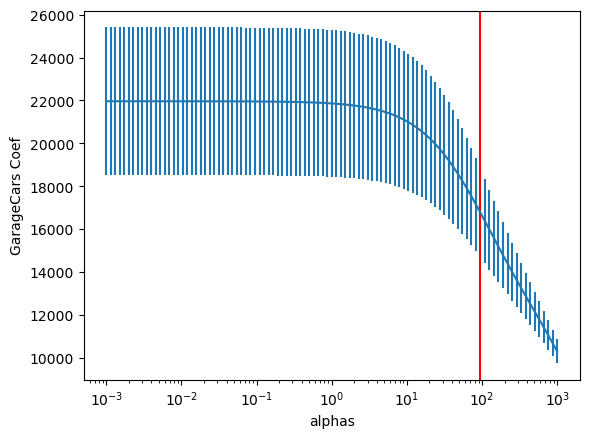

In [25]:
fig, ax = plt.subplots()
ax.errorbar(df_alphas_GarageCars['alphas'], df_alphas_GarageCars['mean_coef'], yerr=df_alphas_GarageCars['std_coef'])
ax.axvline(95.4992586021435, color='red')

ax.set(
    xscale = "log",
    xlabel = "alphas",
    ylabel = "GarageCars Coef"
)

In [26]:
import numpy as np
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-3, 3, num=101)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results_num_only = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
test_score_num_only = cv_results_num_only["test_score"]  # save it for later

coefs = [pipeline[-1].coef_ for pipeline in cv_results_num_only["estimator"]]
coefs = pd.DataFrame(coefs, columns=data_numerical.columns)
print(coefs["GarageCars"].std() )
coefs["GarageCars"]

635.5584197727871


0    12898.503595
1    12442.776755
2    12733.292353
3    12417.239861
4    12661.979209
5    13296.750348
6    12628.912371
7    12677.821176
8    10855.560362
9    12514.084860
Name: GarageCars, dtype: float64

### Question 7
Check the parameter alpha_ (the regularization strength) for the different ridge regressors obtained on each fold.

In which range does alpha_ fall into for most folds?

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data_numerical, target)

np_alphas = np.logspace(-3, 3, num=101)

mdl = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=np_alphas, store_cv_results=True)
)

cv_results = cross_validate(
    estimator=mdl,
    # X=data_train,
    X=data_train,
    y=target_train,
    cv=10,
    scoring="neg_mean_squared_error",
    # scoring="neg_root_mean_squared_error",
    return_estimator=True,
    return_train_score=True
)

np.array( [ est[-1].alpha_ for est in cv_results['estimator'] ] )


array([501.18723363, 501.18723363, 575.43993734, 501.18723363,
       501.18723363, 660.69344801, 501.18723363, 501.18723363,
       575.43993734, 125.89254118])



So far we only used the list of numerical_features to build the predictive model. Now create a preprocessor to deal separately with the numerical and categorical columns:

- categorical features can be selected if they have an object data type;
- use an OneHotEncoder to encode the categorical features;
- numerical features should correspond to the numerical_features as defined  above. This is a subset of the features that are not an object data type;
- use an StandardScaler to scale the numerical features.

The last step of the pipeline should be a RidgeCV with the same set of alphas to evaluate as previously.


### Question 8 (1 point possible)

By comparing the cross-validation test scores fold-to-fold for the model with numerical_features only and the model with both numerical_features and categorical_features, count the number of times the simple model has a better test score than the model with all features. Select the range which this number belongs to:

In [113]:
# print( ames_housing.columns, len(ames_housing.columns), numerical_features, len(numerical_features) )

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer

prepro_num_only = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='drop'
    # remainder='passthrough'
)#.set_output(transform='pandas')

select_cat = make_column_selector(dtype_include=object) #(ames_housing)
 
prepro_ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), select_cat),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='drop'
    # remainder='passthrough'
)#.set_output(transform='pandas')
print('-'*20)
print(f"Columns All {len(ames_housing.columns)} {ames_housing.columns}")
print(f"Columns selected as numerical {len(numerical_features)} {numerical_features}")
cat_cols = select_cat(ames_housing)
print(f"Columns selected as categorical {len(cat_cols)} {cat_cols}")
print('-'*20)
X_prepro = prepro_ct.fit_transform(ames_housing)
print('-'*20)
print(f"Preprocessing in features : {prepro_ct.feature_names_in_}")
print('-'*20)
print(f"Preprocessing params :{prepro_ct.get_params()}")
# prepro_ct.feature_names_in_
features_prepro = prepro_ct.get_feature_names_out()
print('-'*20)
print(f"Preprocessing out features {len(features_prepro)}: {features_prepro}")
print(X_prepro.shape, features_prepro.shape)
X_prepro_df = pd.DataFrame(X_prepro.toarray(), columns=features_prepro)
X_prepro_df.head()


--------------------
Columns All 80 Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'G

,cat__MSZoning_'C (all)',cat__MSZoning_FV,cat__MSZoning_RH,cat__MSZoning_RL,cat__MSZoning_RM,cat__Street_Grvl,cat__Street_Pave,cat__Alley_Grvl,cat__Alley_Pave,cat__LotShape_IR1,...,num__Fireplaces,num__GarageCars,num__GarageArea,num__WoodDeckSF,num__OpenPorchSF,num__EnclosedPorch,num__3SsnPorch,num__ScreenPorch,num__PoolArea,num__MiscVal
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,-0.951226,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.600495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.600495,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.600495,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.600495,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688


In [114]:
# ames_housing.columns
# target_train
len(ames_housing.columns), len(data_train.columns)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ames_housing.drop(columns=["SalePrice"]), ames_housing["SalePrice"])

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate


mdl_ridgecv_num_only = Pipeline(
    [
        ('pp', prepro_num_only),
        ('ridge', RidgeCV(alphas=np_alphas))
    ]
)


cv_results_num_only = cross_validate(
    estimator=mdl_ridgecv_num_only,
    X = X_train,
    y = y_train,
    cv = 10,
    # scoring="neg_mean_squared_error",
    return_estimator=True,
    return_train_score=True
)

mdl_ridgecv_w_ct = Pipeline(
    [
        ('pp', prepro_ct),
        ('ridge', RidgeCV(alphas=np_alphas))
    ]
)

cv_results_w_ct = cross_validate(
    estimator=mdl_ridgecv_w_ct,
    X = X_train,
    y = y_train,
    cv = 10,
    # scoring="neg_mean_squared_error",
    return_estimator=True,
    return_train_score=True
)


In [116]:
pd.DataFrame(cv_results_num_only)

,fit_time,score_time,estimator,test_score,train_score
0,0.030471,0.005254,"(ColumnTransformer(transformers=[('num', Stand...",0.683204,0.731382
1,0.029852,0.004262,"(ColumnTransformer(transformers=[('num', Stand...",0.777922,0.715313
2,0.029852,0.004392,"(ColumnTransformer(transformers=[('num', Stand...",-0.612808,0.814666
3,0.035039,0.006113,"(ColumnTransformer(transformers=[('num', Stand...",0.775248,0.725567
4,0.021215,0.004047,"(ColumnTransformer(transformers=[('num', Stand...",0.818344,0.722483
5,0.026237,0.006328,"(ColumnTransformer(transformers=[('num', Stand...",0.792558,0.715497
6,0.032831,0.003998,"(ColumnTransformer(transformers=[('num', Stand...",0.738524,0.727638
7,0.028782,0.004906,"(ColumnTransformer(transformers=[('num', Stand...",0.666136,0.731019
8,0.027723,0.004533,"(ColumnTransformer(transformers=[('num', Stand...",0.776317,0.721672
9,0.066157,0.006349,"(ColumnTransformer(transformers=[('num', Stand...",0.709326,0.719156


In [117]:
pd.DataFrame(cv_results_w_ct)

,fit_time,score_time,estimator,test_score,train_score
0,1.258008,0.017961,"(ColumnTransformer(transformers=[('cat', OneHo...",0.776649,0.918515
1,1.403803,0.054501,"(ColumnTransformer(transformers=[('cat', OneHo...",0.900455,0.910395
2,1.190404,0.023341,"(ColumnTransformer(transformers=[('cat', OneHo...",-0.245049,0.930116
3,1.318703,0.017642,"(ColumnTransformer(transformers=[('cat', OneHo...",0.723088,0.936734
4,0.991327,0.018032,"(ColumnTransformer(transformers=[('cat', OneHo...",0.874157,0.914323
5,1.001774,0.019357,"(ColumnTransformer(transformers=[('cat', OneHo...",0.880588,0.914701
6,1.139115,0.018822,"(ColumnTransformer(transformers=[('cat', OneHo...",0.890981,0.916132
7,1.107676,0.017893,"(ColumnTransformer(transformers=[('cat', OneHo...",0.811686,0.905757
8,1.247125,0.018558,"(ColumnTransformer(transformers=[('cat', OneHo...",0.897700,0.909656
9,1.149154,0.017962,"(ColumnTransformer(transformers=[('cat', OneHo...",0.898808,0.913390


#### Solution

In [118]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = selector(dtype_include=object)(data)
numerical_features.remove("GarageArea")

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
    (StandardScaler(), numerical_features),
)
model = make_pipeline(preprocessor, RidgeCV(alphas=alphas))
cv_results_num_and_cat = cross_validate(
    model, data, target, cv=10, n_jobs=2
)
test_score_num_and_cat = cv_results_num_and_cat["test_score"]

indices = np.arange(len(test_score_num_only))
plt.scatter(
    indices,
    test_score_num_only,
    color="tab:blue",
    label="numerical features only"
)
plt.scatter(
    indices,
    test_score_num_and_cat,
    color="tab:red",
    label="all features",
)
plt.ylim((0, 1))
plt.xlabel("Cross-validation iteration")
plt.ylabel("R2 score")
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

print(
    "A model using both numerical and categorical features is better than a"
    " model using only numerical features for"
    f" {sum(test_score_num_and_cat > test_score_num_only)} CV iterations out of 10."
)

ValueError: make_column_selector can only be applied to pandas dataframes



In this Module we saw that non-linear feature engineering may yield a more predictive pipeline, as long as we take care of adjusting the regularization to avoid overfitting.

Try this approach by building a new pipeline similar to the previous one but replacing the StandardScaler by a SplineTransformer (with default hyperparameter values) to better model the non-linear influence of the numerical features.

Furthermore, let the new pipeline model feature interactions by adding a new Nystroem step between the preprocessor and the RidgeCV estimator. Set kernel="poly", degree=2 and n_components=300 for this new feature engineering step.
Question 9 (1 point possible)

### Question 9

By comparing the cross-validation test scores fold-to-fold for the model with both numerical_features and categorical_features, and the model that performs non-linear feature engineering; count the number of times the non-linear pipeline has a better test score than the model with simpler preprocessing. Select the range which this number belongs to:


In [119]:
from sklearn.preprocessing import SplineTransformer

In [121]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, SplineTransformer
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer

select_cat = make_column_selector(dtype_include=object) #(ames_housing)
 
prepro_ct_spliner = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), select_cat),
        ('num', SplineTransformer(), numerical_features)
    ],
    remainder='drop'
    # remainder='passthrough'
)#.set_output(transform='pandas')

In [123]:
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate


mdl_ridgecv_num_spliner_nystroem = Pipeline(
    [
        ('pp', prepro_ct_spliner),
        ('nystroem', Nystroem(kernel='poly', degree=2, n_components=300)),
        ('ridge', RidgeCV(alphas=np_alphas))
    ]
)


cv_results_num_spliner_nystroem = cross_validate(
    estimator=mdl_ridgecv_num_spliner_nystroem,
    X = X_train,
    y = y_train,
    cv = 10,
    # scoring="neg_mean_squared_error",
    return_estimator=True,
    return_train_score=True
)

In [129]:
pd.DataFrame(cv_results_num_spliner_nystroem)['test_score'] - pd.DataFrame(cv_results_w_ct)['test_score']

0    0.036235
1   -0.029048
2    0.754729
3    0.163762
4    0.001231
5    0.010287
6    0.023070
7   -0.006833
8    0.002010
9    0.017366
Name: test_score, dtype: float64

In [128]:
pd.DataFrame(cv_results_w_ct)['test_score']

0    0.776649
1    0.900455
2   -0.245049
3    0.723088
4    0.874157
5    0.880588
6    0.890981
7    0.811686
8    0.897700
9    0.898808
Name: test_score, dtype: float64

In [ ]:
#### Solution
from sklearn.kernel_approximation import Nystroem
from sklearn.preprocessing import SplineTransformer


preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
    (SplineTransformer(), numerical_features),
)

model_with_interaction = make_pipeline(
    preprocessor,
    Nystroem(kernel="poly", degree=2, n_components=300),
    RidgeCV(alphas=alphas)
)
cv_results_interactions = cross_validate(
    model_with_interaction,
    data,
    target,
    cv=10,
    n_jobs=2,
)
test_score_interactions = cv_results_interactions["test_score"]

plt.scatter(
    indices,
    test_score_num_only,
    color="tab:blue",
    label="numerical features only"
)
plt.scatter(
    indices,
    test_score_num_and_cat,
    color="tab:red",
    label="all features",
)
plt.scatter(
    indices,
    test_score_interactions,
    color="black",
    label="all features and interactions",
)
plt.ylim((0, 1))
plt.xlabel("Cross-validation iteration")
plt.ylabel("R2 Score")
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

print(
    "A model using all features with non-linear feature engineering is better"
    "  than the previous pipeline for"
    f" {sum(test_score_interactions > test_score_num_and_cat)} CV iterations"
    " out of 10."
)